## Setup

In [1]:
from __future__ import division, print_function, unicode_literals

##Common imports
import numpy as np
import os

# to make this output stable across runs
def reset_graph(seed = 42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# to plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12



In [2]:
def plot_image(image):
    plt.imshow(image,cmap='grey',interpolation='nearest')
    plt.axis('off')

def plot_color_image(image):
    plt.imshow(image.astype(np.uint8),interpolation = 'nearest')
    plt.axis('off')


In [3]:
import tensorflow as tf

## Convolutional Layer

In [4]:
from sklearn.datasets import load_sample_image
china = load_sample_image('china.jpg')
flower = load_sample_image('flower.jpg')


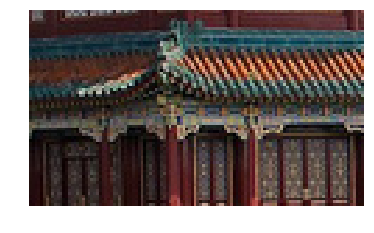

In [21]:
image = china[150:220,130:250]
plot_color_image(image)

In [24]:
height,width,channels = image.shape
image_grayscale = image.mean(axis = 2).astype(np.float32)
images = image_grayscale.reshape(1,height,width,1)

## Using numpy


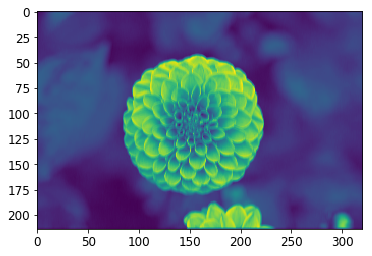

In [38]:
import numpy as np
from sklearn.datasets import load_sample_images

# Load sample images
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
dataset = np.array([china,flower],dtype = np.float32)
batch_size, height, width, channels = dataset.shape

## create filters
filters = np.zeros(shape = (7,7,channels,2))
filters[:,3,:,0] = 1
filters[3,:,:,1] = 1

X = tf.placeholder(tf.float32,shape =(None,height,width,channels))
convolution = tf.nn.conv2d(X,filters,strides = [1,2,2,1],padding ='SAME')

with tf.Session() as sess:
    output = sess.run(convolution,feed_dict = {X:dataset})

plt.imshow(output[1, :, :, 0])
plt.show()

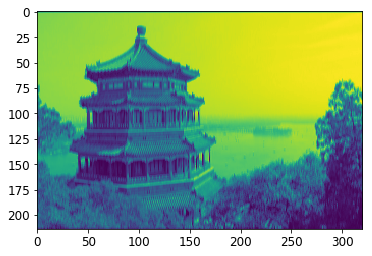

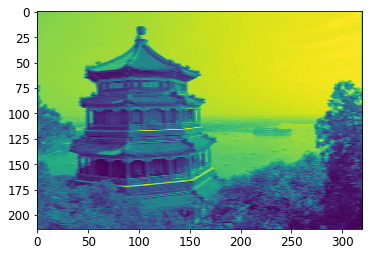

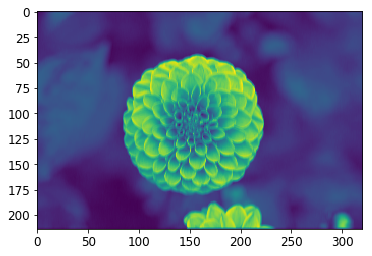

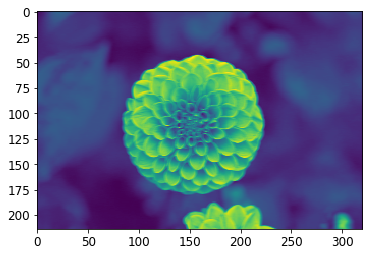

In [42]:
for image_index in (0, 1):
    for feature_map_index in (0, 1):
        plt.imshow(output[image_index, :, :, feature_map_index])
        plt.show()

## Pooling Layer

In [43]:
batch_size, height, width, channels = dataset.shape
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line

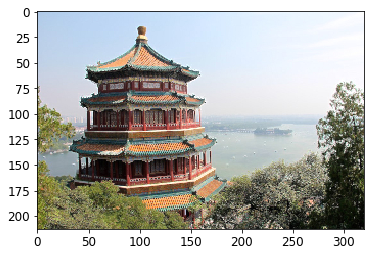

In [44]:
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
max_pool = tf.nn.max_pool(X, ksize=[1,2,2,1], strides=[1,2,2,1],padding="VALID")

with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict={X: dataset})

plt.imshow(output[0].astype(np.uint8))  # plot the output for the 1st image
plt.show()

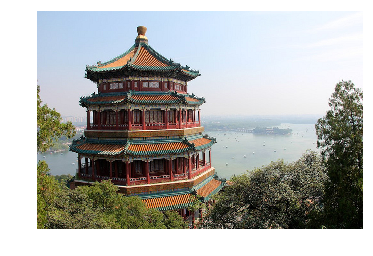

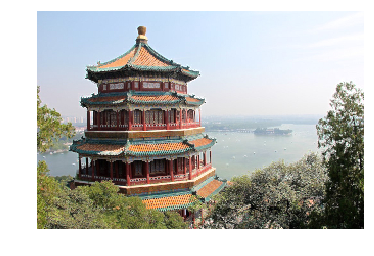

In [45]:
plot_color_image(dataset[0])
plt.show()
    
plot_color_image(output[0])
plt.show()

# MNIST CNN


In [9]:
import tensorflow as tf
height = 28
width = 28
channels = 1
n_inputs = height*width

conv1_fmaps = 32
conv1_ksize = 3
conv1_stride = 1
conv1_pad = 'SAME'

conv2_fmaps = 64
conv2_ksize = 3
conv2_stride = 2
conv2_pad = 'SAME'

pool3_fmaps = conv2_fmaps

n_outputs = 10

with tf.name_scope("inputs"):
    X = tf.placeholder(tf.float32,shape = (None,n_inputs),name = "X")
    X_reshaped = tf.reshape(X,shape = (-1,height,width,channels))
    y = tf.placeholder(tf.int32, shape = (None))
conv1 = tf.layers.conv2d(X_reshaped,filters = conv1_fmaps,kernel_size = conv1_ksize,strides = conv1_stride,padding = conv1_pad,
                         activation = tf.nn.relu)

conv2 = tf.layers.conv2d(conv1, filters = conv2_fmaps,kernel_size = conv2_ksize, strides = conv2_stride,
                        padding = conv2_pad,
                        activation = tf.nn.relu)

with tf.name_scope('pool3'):
    pool3 = tf.nn.max_pool(conv2, ksize = [1,2,2,1],strides = [1,2,2,1],padding = 'VALID')
    pool3_flat = tf.reshape(pool3,shape = (-1,pool3_fmaps * 7 * 7))
